In [1]:
import pandas as pd
import datetime
from os import listdir
import os, os.path
from os.path import isfile, join
import numpy as np
import csv
import re
import pandas as pd
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.log.exporter.xes import exporter as xes_exporter
from pm4py.objects.log.util import dataframe_utils
import matplotlib.pyplot as plt
import seaborn as sns
#case frequency:
#df_prueba.groupby('General activity')['case:concept:name'].agg(['unique'])['unique'].apply(lambda x: len(x)).sort_values(ascending=False)

In [2]:
df_tipo=pd.read_csv("Log of analysis of time aspects.csv",index_col=0)
df_tipo

,case:id,case:concept:name,concept:name,Variant,time:timestamp,Question,Report,Year,Category,Type,Tupla,Organization
0,A1 P2 BPI 2020,A1 P2 BPI 2020,Calculate cycle time,Calculate cycle time of the whole process for ...,2021-11-19 09:37:02.248560,P2,A1,2020,Academic,Analyze Cycle Time,A12020,TechnischeUniversitätBerlin
1,A1 P2 BPI 2020,A1 P2 BPI 2020,Compare cycle time,Compare cycle time,2021-11-19 10:37:02.248560,P2,A1,2020,Academic,Analyze Cycle Time,A12020,TechnischeUniversitätBerlin
2,A2 P2 BPI 2020,A2 P2 BPI 2020,Calculate cycle time,Get cycle time from the previous question,2021-11-19 11:37:02.248560,P2,A2,2020,Student,Analyze Cycle Time,A22020,FacultyofScienceUtrechtUniversity
3,A2 P2 BPI 2020,A2 P2 BPI 2020,Compare cycle time,Compare cycle time,2021-11-19 12:37:02.248560,P2,A2,2020,Student,Analyze Cycle Time,A22020,FacultyofScienceUtrechtUniversity
4,A7 P2 BPI 2020,A7 P2 BPI 2020,Calculate throughput,Calculate throughput,2021-11-19 13:37:02.248560,P2,A7,2020,Academic,Analyze Cycle Time,A72020,GermanResearchCenterforArtificialIntelligenceDFKI
...,...,...,...,...,...,...,...,...,...,...,...,...
943,A19 P1 BPI 2020,A19 P1 BPI 2020,Group traces,Group traces by year,2021-12-28 16:37:02.248560,P1,A19,2020,Professional,Manipulation,A192020,Sberbank
944,A19 P1 BPI 2020,A19 P1 BPI 2020,Group traces,Group traces by activities,2021-12-28 17:37:02.248560,P1,A19,2020,Professional,Manipulation,A192020,Sberbank
945,A19 P1 BPI 2020,A19 P1 BPI 2020,Calculate statistics,Calculate Statistics of activities,2021-12-28 18:37:02.248560,P1,A19,2020,Professional,Calculate statistics,A192020,Sberbank
946,A19 P1 BPI 2020,A19 P1 BPI 2020,Calculate throughput,Calculate throughput,2021-12-28 19:37:02.248560,P1,A19,2020,Professional,Analyze Cycle Time,A192020,Sberbank


In [3]:
df_tipo['concept:name'].value_counts().mean()

16.928571428571427

In [4]:
df_tipo.groupby(['Type'])['concept:name'].value_counts()

Type                  concept:name                                                 
Analyze Cycle Time    Calculate cycle time                                             157
                      Identify bottlenecks                                              61
                      Compare cycle time                                                30
                      Calculate waiting time                                            27
                      Calculate throughput                                              18
                      Calculate processing time                                          9
                      Comparative of throughput                                          2
                      Compare waiting time with processing time                          2
                      Analyze cycle time depending on the events                         1
                      Calculate intervals of time of the traces                          1
      

In [5]:
d = df_tipo.groupby(['Type', 'concept:name'])
for n, g in d:
    print(n, len(g['Variant'].unique()))

('Analyze Cycle Time', 'Analyze cycle time depending on the events') 1
('Analyze Cycle Time', 'Calculate cycle time') 13
('Analyze Cycle Time', 'Calculate intervals of time of the traces') 1
('Analyze Cycle Time', 'Calculate processing time') 1
('Analyze Cycle Time', 'Calculate throughput') 1
('Analyze Cycle Time', 'Calculate waiting time') 1
('Analyze Cycle Time', 'Comparative of throughput') 1
('Analyze Cycle Time', 'Compare cycle time') 1
('Analyze Cycle Time', 'Compare processing time') 1
('Analyze Cycle Time', 'Compare waiting time with processing time') 1
('Analyze Cycle Time', 'Identify bottlenecks') 5
('Calculate statistics', 'Calculate average of activities per trace') 1
('Calculate statistics', 'Calculate frequency') 7
('Calculate statistics', 'Calculate number of elements') 7
('Calculate statistics', 'Calculate percentages') 4
('Calculate statistics', 'Calculate statistics') 4
('Identification', 'Identify activities') 4
('Identification', 'Identify attributes') 3
('Identific

In [6]:
df_tipo['concept:name'].value_counts().mean()

16.928571428571427

In [7]:
df_tipo['concept:name'].value_counts().head(16)

Calculate cycle time            157
Filter traces                    83
Calculate number of elements     76
Identify bottlenecks             61
Group traces                     58
Calculate percentages            55
Represent process map            47
Represent bar charts             36
Calculate statistics             35
Identify attributes              34
Represent histograms             32
Compare cycle time               30
Calculate waiting time           27
Represent temporal series        25
Calculate frequency              23
Calculate throughput             18
Name: concept:name, dtype: int64

(array([5., 4., 3., 1., 2., 0., 0., 0., 0., 1.]),
 array([ 18. ,  31.9,  45.8,  59.7,  73.6,  87.5, 101.4, 115.3, 129.2,
        143.1, 157. ]),
 <a list of 10 Patch objects>)

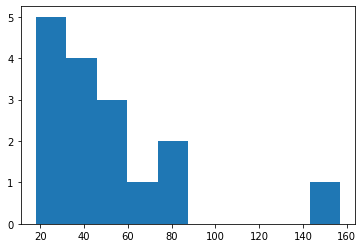

In [8]:
plt.hist(df_tipo['concept:name'].value_counts().head(16))

In [9]:
df_tipo['Variant'].value_counts().head(10)

Filter traces by activities                                                  44
Calculate percentage of traces                                               42
Identify activities as bottlenecks applying temporal performance criteria    40
Calculate number of traces                                                   39
Represent process map with cycle time                                        35
Compare cycle time                                                           30
Represent histograms of cycle time                                           29
Calculate waiting time                                                       27
Identify values of attributes                                                21
Group traces depending on attributes                                         21
Name: Variant, dtype: int64

In [10]:
df_tipo['Variant'].unique()

array(['Calculate cycle time of the whole process for all traces',
       'Compare cycle time', 'Get cycle time from the previous question',
       'Calculate throughput', 'Comparative of throughput',
       'Represent scatterplot', 'Represent boxplots of cycle time',
       'Preprocess the traces of the logs',
       'Calculate cycle time of only a subset of pairs of events for all traces',
       'Identify specific subprocesses',
       'Calculate Statistics of cycle time',
       'Represent histograms of cycle time',
       'Calculate cycle time of a fragment of the process for all traces',
       'Calculate number of traces', 'Calculate number of activities',
       'Calculate average of activities per trace',
       'Calculate percentage of traces',
       'Calculate Statistics of attributes',
       'Group traces depending on attributes',
       'Represent histograms of attributes',
       'Represent bar charts of traces', 'Filter traces by activities',
       'Filter activities 

###  Variantes del top 5 Operaciones más frecuentes

In [11]:
print(df_tipo[df_tipo['concept:name'] == 'Calculate cycle time']['Variant'].value_counts())
print(df_tipo[df_tipo['concept:name'] == 'Calculate cycle time']['Variant'].value_counts().mean())

Calculate cycle time of the whole process for all traces                              21
Calculate cycle time of a fragment of the process for a subset of traces              20
Calculate cycle time of the whole process for each subset of traces                   19
Calculate cycle time of the whole process for a subset of traces                      17
Calculate cycle time for all pairs of events for all traces                           16
Get cycle time from the previous question                                             13
Calculate cycle time of only a subset of pairs of events for a subset of traces        9
Calculate cycle time of a fragment of the process for all traces                       8
Calculate cycle time for all pairs of events for each subset of traces                 8
Calculate cycle time for all pairs of events for a subset of traces                    8
Calculate cycle time of only a subset of pairs of events for each subset of traces     7
Calculate cycle time 

In [14]:
print(df_tipo[df_tipo['concept:name'] == 'Identify bottlenecks']['Variant'].value_counts())
print(df_tipo[df_tipo['concept:name'] == 'Identify bottlenecks']['Variant'].value_counts().mean())

Identify activities as bottlenecks applying temporal performance criteria                             40
Identify sub-processes as bottlenecks applying temporal performance criteria                          11
Identify organizational units as bottlenecks applying temporal performance criteria                    5
Identify sub-processes with incorrect orders with respect to the happy path as bottlenecks             4
Identify activities as bottlenecks applying temporal performance criteria and statistical measures     1
Name: Variant, dtype: int64
12.2


In [12]:
print(df_tipo[df_tipo['concept:name'] == 'Filter traces']['Variant'].value_counts())
print(df_tipo[df_tipo['concept:name'] == 'Filter traces']['Variant'].value_counts().mean())

Filter traces by activities                           44
Filter traces by attributes                           15
Filter traces by cycle time                            8
Filter traces by frequency                             7
Filter traces by year                                  6
Filter traces depending on the order of activities     2
Filter traces by subprocesses                          1
Name: Variant, dtype: int64
11.857142857142858


In [15]:
print(df_tipo[df_tipo['concept:name'] == 'Group traces']['Variant'].value_counts())
print(df_tipo[df_tipo['concept:name'] == 'Group traces']['Variant'].value_counts().mean())

Group traces depending on attributes                      21
Group traces by activities                                17
Group traces by year                                       5
Group traces by cycle time                                 4
Group traces by sub-processes                              2
Group traces by resources                                  2
Group traces by month                                      2
Group traces by roles                                      1
Group traces by organizational units                       1
Group traces by waiting                                    1
Group traces according to the repetition of activities     1
Group traces by endpoints                                  1
Name: Variant, dtype: int64
4.833333333333333


In [13]:
print(df_tipo[df_tipo['concept:name'] == 'Calculate number of elements']['Variant'].value_counts())
print(df_tipo[df_tipo['concept:name'] == 'Calculate number of elements']['Variant'].value_counts().mean())

Calculate number of traces                            39
Calculate number of activities                        14
Calculate number of events                            10
Calculate number of sub-processes                      5
Calculate number of variants                           4
Calcute number of values of an attribute               3
Calculate number of different organizational units     1
Name: Variant, dtype: int64
10.857142857142858


In [19]:
print(df_tipo[df_tipo['concept:name'] == 'Calculate percentages']['Variant'].value_counts())
print(df_tipo[df_tipo['concept:name'] == 'Calculate percentages']['Variant'].value_counts().mean())

Calculate percentage of traces           42
Calculate percentage of sub-processes     7
Calculate percentage of events            4
Calculate percentage of activities        2
Name: Variant, dtype: int64
13.75


In [20]:
print(df_tipo[df_tipo['concept:name'] == 'Calculate frequency']['Variant'].value_counts())
print(df_tipo[df_tipo['concept:name'] == 'Calculate frequency']['Variant'].value_counts().mean())

Calculate frequency of activities       7
Calculate frequency of sub-processes    5
Calculate frequency of attributes       3
Calculate frequency of events           3
Calculate frequency of traces           3
Calculate frequency of variants         1
Calculate frequency of resources        1
Name: Variant, dtype: int64
3.2857142857142856


In [25]:
print(df_tipo[df_tipo['concept:name'] == 'Represent process map']['Variant'].value_counts())
print(df_tipo[df_tipo['concept:name'] == 'Represent process map']['Variant'].value_counts().mean())

Represent process map with cycle time         35
Represent process map with frequency          10
Get process map from the previous question     2
Name: Variant, dtype: int64
15.666666666666666


In [24]:
print(df_tipo[df_tipo['concept:name'] == 'Represent bar charts']['Variant'].value_counts())
print(df_tipo[df_tipo['concept:name'] == 'Represent bar charts']['Variant'].value_counts().mean())

Represent bar charts of cycle time       13
Represent bar charts of attributes        7
Represent bar charts of traces            6
Represent bar charts of sub-processes     6
Represent bar charts of waiting time      3
Represent bart charts of activities       1
Name: Variant, dtype: int64
6.0


In [26]:
print(df_tipo[df_tipo['concept:name'] == 'Represent histograms']['Variant'].value_counts())
print(df_tipo[df_tipo['concept:name'] == 'Represent histograms']['Variant'].value_counts().mean())

Represent histograms of cycle time      29
Represent histograms of waiting time     2
Represent histograms of attributes       1
Name: Variant, dtype: int64
10.666666666666666


In [27]:
print(df_tipo[df_tipo['concept:name'] == 'Represent temporal series']['Variant'].value_counts())
print(df_tipo[df_tipo['concept:name'] == 'Represent temporal series']['Variant'].value_counts().mean())

Represent temporal series of activities      10
Represent temporal series of traces           9
Represent temporal series of subprocesses     5
Represent temporal series of throughput       1
Name: Variant, dtype: int64
6.25


In [21]:
print(df_tipo[df_tipo['concept:name'] == 'Calculate statistics']['Variant'].value_counts())
print(df_tipo[df_tipo['concept:name'] == 'Calculate statistics']['Variant'].value_counts().mean())

Calculate Statistics of cycle time    18
Calculate Statistics of throughput     9
Calculate Statistics of attributes     7
Calculate Statistics of activities     1
Name: Variant, dtype: int64
8.75


In [28]:
print(df_tipo[df_tipo['concept:name'] == 'Identify attributes']['Variant'].value_counts())
print(df_tipo[df_tipo['concept:name'] == 'Identify attributes']['Variant'].value_counts().mean())

Identify values of attributes        21
Identify attributes by cycle time    12
Identify attributes by traces         1
Name: Variant, dtype: int64
11.333333333333334


### Análisis de variantes

In [17]:
frec_op=df_tipo['concept:name'].value_counts().head(16).index
frec_op

Index(['Calculate cycle time', 'Filter traces', 'Calculate number of elements',
       'Identify bottlenecks', 'Group traces', 'Calculate percentages',
       'Represent process map', 'Represent bar charts', 'Calculate statistics',
       'Identify attributes', 'Represent histograms', 'Compare cycle time',
       'Calculate waiting time', 'Represent temporal series',
       'Calculate frequency', 'Calculate throughput'],
      dtype='object')

In [52]:
len(df_tipo[df_tipo['concept:name'].isin(frec_op)]['Variant'].unique())

81

In [16]:
v = df_tipo.groupby(by=['concept:name'])
variantes = v.apply(lambda x: len(x["Variant"].unique()))

In [17]:
variantes.sort_values()

concept:name
Analyze cycle time depending on the events                        1
Represent scatterplot                                             1
Group events by time                                              1
Group organizational units                                        1
Group sub-processes                                               1
Identify impact of bottlenecks by organizational unit             1
Identify specific subprocesses                                    1
Identify traces by cycle time                                     1
Identify transitions by cycle time                                1
Preprocess the events of the logs                                 1
Preprocess the traces of the logs                                 1
Represent boxplots of cycle time                                  1
Represent circular charts of attributes of the traces             1
Represent correlation graph of variables                          1
Represent density of cycle time    

(array([35.,  2.,  5.,  7.,  1.,  1.,  3.,  0.,  0.,  0.,  0.,  1.,  1.,
         0.]),
 array([ 0.5       ,  1.46428571,  2.42857143,  3.39285714,  4.35714286,
         5.32142857,  6.28571429,  7.25      ,  8.21428571,  9.17857143,
        10.14285714, 11.10714286, 12.07142857, 13.03571429, 14.        ]),
 <a list of 14 Patch objects>)

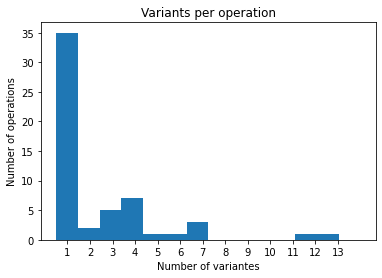

In [18]:
fig, ax = plt.subplots()
# ax.axis("off")
plt.title('Variants per operation')
plt.xlabel('Number of variantes')
plt.ylabel('Number of operations')
plt.xticks(np.arange(1, 14, 1.0))
plt.hist(variantes, 14, range=[0.5, 14])


In [19]:
df_tipo['Variant'].value_counts().mean()

6.820143884892087

In [29]:
frec_variants_manip=df_tipo[df_tipo['Type']=="Representation"]['Variant'].value_counts()
frec_variants_manip[frec_variants_manip>6.82]

Represent process map with cycle time      35
Represent histograms of cycle time         29
Represent bar charts of cycle time         13
Represent temporal series of activities    10
Represent process map with frequency       10
Represent temporal series of traces         9
Represent bar charts of attributes          7
Name: Variant, dtype: int64

In [42]:
frec_variants_manip=df_tipo[df_tipo['Type']=="Analyze Cycle Time"]['Variant'].value_counts()
frec_variants_manip[frec_variants_manip>6.82]

Identify activities as bottlenecks applying temporal performance criteria             40
Compare cycle time                                                                    30
Calculate waiting time                                                                27
Calculate cycle time of the whole process for all traces                              21
Calculate cycle time of a fragment of the process for a subset of traces              20
Calculate cycle time of the whole process for each subset of traces                   19
Calculate throughput                                                                  18
Calculate cycle time of the whole process for a subset of traces                      17
Calculate cycle time for all pairs of events for all traces                           16
Get cycle time from the previous question                                             13
Identify sub-processes as bottlenecks applying temporal performance criteria          11
Calculate processing 

In [3]:
#-----------------------------------------------------------------------------------------------------------------------------
#Variantes por tipo de pregunta

In [3]:
df_tipo.head()

,case:id,case:concept:name,concept:name,Variant,time:timestamp,Question,Report,Year,Category,Type,Tupla,Organization
0,A1 P2 BPI 2020,A1 P2 BPI 2020,Calculate cycle time,Calculate cycle time of the whole process for ...,2021-11-19 09:37:02.248560,P2,A1,2020,Academic,Analyze Cycle Time,A12020,TechnischeUniversitätBerlin
1,A1 P2 BPI 2020,A1 P2 BPI 2020,Compare cycle time,Compare cycle time,2021-11-19 10:37:02.248560,P2,A1,2020,Academic,Analyze Cycle Time,A12020,TechnischeUniversitätBerlin
2,A2 P2 BPI 2020,A2 P2 BPI 2020,Calculate cycle time,Get cycle time from the previous question,2021-11-19 11:37:02.248560,P2,A2,2020,Student,Analyze Cycle Time,A22020,FacultyofScienceUtrechtUniversity
3,A2 P2 BPI 2020,A2 P2 BPI 2020,Compare cycle time,Compare cycle time,2021-11-19 12:37:02.248560,P2,A2,2020,Student,Analyze Cycle Time,A22020,FacultyofScienceUtrechtUniversity
4,A7 P2 BPI 2020,A7 P2 BPI 2020,Calculate throughput,Calculate throughput,2021-11-19 13:37:02.248560,P2,A7,2020,Academic,Analyze Cycle Time,A72020,GermanResearchCenterforArtificialIntelligenceDFKI


In [22]:
question1="P1"
year1=2020
val=np.mean(df_tipo[(df_tipo['Question']==question1) & (df_tipo['Year']==year1)]['Variant'].value_counts())
vc=df_tipo[(df_tipo['Question']==question1) & (df_tipo['Year']==year1)]['Variant'].value_counts()
vc=vc[vc>val]
vc

Calculate number of traces                                                  12
Filter traces by activities                                                 11
Calculate throughput                                                        10
Calculate percentage of traces                                               9
Represent histograms of cycle time                                           6
Represent temporal series of traces                                          6
Calculate cycle time of the whole process for all traces                     6
Calculate cycle time of a fragment of the process for a subset of traces     5
Identify values of attributes                                                5
Calculate cycle time of the whole process for a subset of traces             5
Calculate cycle time of a fragment of the process for all traces             4
Compare cycle time                                                           4
Group traces by year                                

In [20]:
question2="P4"
year2=2020
val2=np.mean(df_tipo[(df_tipo['Question']==question2) & (df_tipo['Year']==year2)]['Variant'].value_counts())
vc2=df_tipo[(df_tipo['Question']==question2) & (df_tipo['Year']==year2)]['Variant'].value_counts()
vc2=vc2[vc2>val2]
vc2

Calculate cycle time for all pairs of events for all traces                 6
Represent temporal series of activities                                     5
Represent process map with cycle time                                       5
Filter traces by activities                                                 4
Represent heatmaps                                                          4
Group traces by activities                                                  4
Calculate percentage of traces                                              4
Calculate throughput                                                        4
Filter traces by frequency                                                  3
Calculate Statistics of throughput                                          3
Identify transitions by cycle time                                          3
Preprocess the traces of the logs                                           3
Calculate cycle time of the whole process for a subset of traces

In [7]:
# questions=[question1,question2]
# years=[year1,year2]
# val2=np.mean(df_tipo[(df_tipo['Question'].isin(questions)) & (df_tipo['Year'].isin(years))]['Variant'].value_counts())
# vc2=df_tipo[(df_tipo['Question']==question2) & (df_tipo['Year']==year2)]['Variant'].value_counts()
# vc2=vc2[vc2>val2]

In [18]:
df2=df_tipo[(df_tipo['Question']==question2) & (df_tipo['Year']==year2)]
df2_filtrado=df2[df2['Variant'].isin(vc2.index)]

df1=df_tipo[(df_tipo['Question']==question1) & (df_tipo['Year']==year1)]
df1_filtrado=df1[df1['Variant'].isin(vc.index)]

questionsUnited=pd.concat([df1_filtrado,df2_filtrado])
questionsUnited.drop_duplicates(subset=['Variant'])['Type'].value_counts()
#questionsUnited['Type'].value_counts()

Analyze Cycle Time      7
Manipulation            4
Identification          3
Calculate statistics    2
Representation          2
Name: Type, dtype: int64

In [51]:
set(vc2.index).intersection(set(vc.index))

{'Calculate Statistics of cycle time',
 'Compare cycle time',
 'Represent histograms of cycle time'}

In [23]:
question3="P2"
year3=2019
val3=np.mean(df_tipo[(df_tipo['Question']==question3) & (df_tipo['Year']==year3)]['Variant'].value_counts())
vc3=df_tipo[(df_tipo['Question']==question3) & (df_tipo['Year']==year3)]['Variant'].value_counts()
vc3=vc3[vc3>val3]
vc3

Group traces depending on attributes                                                  15
Calculate number of traces                                                            11
Represent bar charts of cycle time                                                     9
Filter traces by activities                                                            8
Filter traces by attributes                                                            7
Represent process map with cycle time                                                  7
Calculate percentage of traces                                                         7
Identify attributes by cycle time                                                      6
Calculate cycle time of a fragment of the process for a subset of traces               6
Represent bar charts of attributes                                                     6
Represent histograms of cycle time                                                     6
Calculate cycle time 

In [30]:
#set(vc2.index).intersection(set(vc.index))

In [43]:
set.intersection(set(vc.index), set(vc2.index), set(vc3.index))

{'Calculate cycle time of a fragment of the process for a subset of traces',
 'Calculate cycle time of the whole process for a subset of traces',
 'Calculate percentage of traces',
 'Filter traces by activities'}

In [52]:
val3

3.2615384615384615

In [24]:
#Agrupacion tres preguntas
df2=df_tipo[(df_tipo['Question']==question2) & (df_tipo['Year']==year2)]
df2_filtrado=df2[df2['Variant'].isin(vc2.index)]

df1=df_tipo[(df_tipo['Question']==question1) & (df_tipo['Year']==year1)]
df1_filtrado=df1[df1['Variant'].isin(vc.index)]

df3=df_tipo[(df_tipo['Question']==question3) & (df_tipo['Year']==year3)]
df3_filtrado=df1[df1['Variant'].isin(vc.index)]


questionsUnited=pd.concat([df1_filtrado,df2_filtrado,df3_filtrado])
questionsUnited.drop_duplicates(subset=['Variant'])['Type'].value_counts()

Analyze Cycle Time      7
Representation          5
Manipulation            5
Calculate statistics    3
Identification          2
Name: Type, dtype: int64